# Problem Statement
1. Bagaimana cara mengembangkan model klasifikasi yang akurat untuk memprediksi pelanggan mana yang akan churn?
2. Faktor-faktor apa saja yang paling signifikan dalam mendorong keputusan pelanggan untuk churn, dan bagaimana kita bisa menggunakannya untuk menyusun strategi retensi yang proaktif?

# Objective

1. Membangun model prediksi churn dengan metrik yang relevan (Recall, F1-Score).
2. Memberikan rekomendasi retensi berbasis data, khususnya untuk:
    * Pelanggan Baru (<12 bulan): paling rentan churn.
    * Pelanggan Bernilai Tinggi: prioritas utama dipertahankan.

# Setup Awal

In [ ]:
import pandas as pd

# Menghubungkan (mount) Google Drive ke environment Colab
from google.colab import drive
drive.mount('/content/drive')

# Mengatur agar pandas menampilkan semua kolom saat memanggil .head()
pd.set_option('display.max_columns', None)

print(" Setup awal selesai.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Setup awal selesai.


In [ ]:
BASE_PATH = '/content/drive/MyDrive/Dibimbing/Exam Penyaluran Kerja/DS/Dataset/'

# Definisikan path untuk setiap file CSV
path_customer = BASE_PATH + 'Customer_Info.csv'
path_location = BASE_PATH + 'Location_Data.csv'
path_online = BASE_PATH + 'Online_Services.csv'
path_payment = BASE_PATH + 'Payment_Info.csv'
path_service = BASE_PATH + 'Service_Options.csv'
path_status = BASE_PATH + 'Status_Analysis.csv'

print(" Path file berhasil didefinisikan.")

 Path file berhasil didefinisikan.


# Inspeksi Awal Data

In [ ]:
# Coba inspeksi setiap tabel dulu
try:
    dataframes = {
        "Customer": pd.read_csv(path_customer),
        "Location": pd.read_csv(path_location),
        "Online": pd.read_csv(path_online),
        "Payment": pd.read_csv(path_payment),
        "Service": pd.read_csv(path_service),
        "Status": pd.read_csv(path_status)
    }
    print("Semua 6 file CSV berhasil dimuat.")
except FileNotFoundError as e:
    print(f"Error: Salah satu file tidak ditemukan. Pastikan path di BASE_PATH sudah benar.")
    print(f"Detail error: {e}")
    # Hentikan eksekusi jika ada file yang tidak ditemukan
    raise

print("\n--- Memulai Diagnosis Setiap File ---")
for name, df in dataframes.items():
    print(f"\n----- Menganalisis File: {name} -----")
    print(f"Bentuk Data (Baris, Kolom): {df.shape}")

    # Cek keunikan customer_id
    if 'customer_id' in df.columns:
        is_unique = df['customer_id'].is_unique
        print(f"Apakah customer_id unik? {' Ya' if is_unique else ' Tidak'}")
        if not is_unique:
            # Tampilkan customer_id yang duplikat jika ada
            duplicated_ids = df[df.duplicated(subset=['customer_id'], keep=False)]
            print("customer_id yang duplikat:")
            print(duplicated_ids)
    else:
        print(" Kolom customer_id tidak ditemukan.")

    # Cek missing values
    missing_values = df.isnull().sum().sum()
    print(f"Jumlah Missing Values: {missing_values}")

    # Ringkasan tipe data & kolom
    print("\n Ringkasan Kolom:")
    print(df.dtypes)

    # Cek kolom dengan missing values signifikan (>30%)
    high_missing = df.isnull().mean()
    high_missing_cols = high_missing[high_missing > 0.3]
    if not high_missing_cols.empty:
        print("\n Kolom dengan missing values > 30%:")
        print(high_missing_cols)

    # Sampel data
    print("\n Contoh 5 Baris Pertama:")
    display(df.head())

print("\n--- Diagnosis Selesai ---")

Semua 6 file CSV berhasil dimuat.

--- Memulai Diagnosis Setiap File ---

----- Menganalisis File: Customer -----
Bentuk Data (Baris, Kolom): (7043, 9)
Apakah customer_id unik?  Ya
Jumlah Missing Values: 0

 Ringkasan Kolom:
customer_id             object
gender                  object
age                      int64
under_30                object
senior_citizen          object
partner                 object
dependents              object
number_of_dependents     int64
married                 object
dtype: object

 Contoh 5 Baris Pertama:


,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,Male,50,No,No,No,No,0,No
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes



----- Menganalisis File: Location -----
Bentuk Data (Baris, Kolom): (7043, 8)
Apakah customer_id unik?  Ya
Jumlah Missing Values: 0

 Ringkasan Kolom:
customer_id          object
country              object
state                object
city                 object
zip_code              int64
total_population      int64
latitude            float64
longitude           float64
dtype: object

 Contoh 5 Baris Pertama:


,customer_id,country,state,city,zip_code,total_population,latitude,longitude
0,0002-ORFBO,United States,California,Frazier Park,93225,4498,34.827662,-118.999073
1,0003-MKNFE,United States,California,Glendale,91206,31297,34.162515,-118.203869
2,0004-TLHLJ,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613
3,0011-IGKFF,United States,California,Martinez,94553,46677,38.014457,-122.115432
4,0013-EXCHZ,United States,California,Camarillo,93010,42853,34.227846,-119.079903



----- Menganalisis File: Online -----
Bentuk Data (Baris, Kolom): (7043, 11)
Apakah customer_id unik?  Ya
Jumlah Missing Values: 1526

 Ringkasan Kolom:
customer_id             object
phone_service           object
internet_service        object
online_security         object
online_backup           object
device_protection       object
premium_tech_support    object
streaming_tv            object
streaming_movies        object
streaming_music         object
internet_type           object
dtype: object

 Contoh 5 Baris Pertama:


,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,0002-ORFBO,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,0004-TLHLJ,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,0011-IGKFF,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,0013-EXCHZ,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic



----- Menganalisis File: Payment -----
Bentuk Data (Baris, Kolom): (7043, 11)
Apakah customer_id unik?  Ya
Jumlah Missing Values: 0

 Ringkasan Kolom:
customer_id                           object
contract                              object
paperless_billing                     object
payment_method                        object
monthly_ charges                     float64
avg_monthly_long_distance_charges    float64
total_charges                        float64
total_refunds                        float64
total_extra_data_charges               int64
total_long_distance_charges          float64
total_revenue                        float64
dtype: object

 Contoh 5 Baris Pertama:


,customer_id,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,0002-ORFBO,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81
1,0003-MKNFE,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28
2,0004-TLHLJ,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45
3,0011-IGKFF,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51
4,0013-EXCHZ,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54



----- Menganalisis File: Service -----
Bentuk Data (Baris, Kolom): (7043, 10)
Apakah customer_id unik?  Ya
Jumlah Missing Values: 3877

 Ringkasan Kolom:
customer_id                object
tenure                      int64
internet_service           object
phone_service              object
multiple_lines             object
avg_monthly_gb_download     int64
unlimited_data             object
offer                      object
referred_a_friend          object
number_of_referrals         int64
dtype: object

 Kolom dengan missing values > 30%:
offer    0.550476
dtype: float64

 Contoh 5 Baris Pertama:


,customer_id,tenure,internet_service,phone_service,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals
0,0002-ORFBO,9,Yes,Yes,No,16,Yes,NaN,Yes,2
1,0003-MKNFE,9,Yes,Yes,Yes,10,No,NaN,No,0
2,0004-TLHLJ,4,Yes,Yes,No,30,Yes,Offer E,No,0
3,0011-IGKFF,13,Yes,Yes,No,4,Yes,Offer D,Yes,1
4,0013-EXCHZ,3,Yes,Yes,No,11,Yes,NaN,Yes,3



----- Menganalisis File: Status -----
Bentuk Data (Baris, Kolom): (7043, 9)
Apakah customer_id unik?  Ya
Jumlah Missing Values: 5174

 Ringkasan Kolom:
customer_id           object
satisfaction_score     int64
cltv                   int64
customer_status       object
churn_score            int64
churn_label           object
churn_value            int64
churn_category        object
churn_reason          object
dtype: object

 Kolom dengan missing values > 30%:
churn_reason    0.73463
dtype: float64

 Contoh 5 Baris Pertama:


,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability



--- Diagnosis Selesai ---


Kesimpulan Awal – Inspeksi Data

**Struktur Data Solid**

* Semua 6 file berisi 7.043 baris dengan customer_id unik di tabel Customer.

* Kunci penghubung (customer_id) konsisten di seluruh file.

**Masalah Utama – Missing Values**

* Online: 1.526 missing values pada kolom layanan online -> logis karena pelanggan tanpa internet.

* Service: 3.877 missing values pada offer (±55%) -> mayoritas pelanggan tidak menerima promo khusus.

* Status: 5.174 missing values pada churn_reason (±73%) -> hanya diisi jika pelanggan churn.

**Minor Issue**

* Ada kolom dengan spasi di awal seperti monthly_charges yang perlu dibersihkan untuk memudahkan analisis.





In [ ]:
df_merged = dataframes['Customer'].copy()

# Loop untuk menggabungkan sisa DataFrame
for name, df_to_merge in dataframes.items():
    if name != 'Customer': # Jangan gabungkan dengan dirinya sendiri
        df_merged = pd.merge(df_merged, df_to_merge, on='customer_id', how='left')

print("\n Semua DataFrame berhasil digabungkan menjadi satu.")

print("\n--- Informasi Dataset Gabungan (Setelah Merge) ---")
# .info() untuk melihat ringkasan teknis: jumlah baris, kolom, dan tipe data
df_merged.info()

print("\n--- 5 Baris Pertama Dataset Gabungan ---")
# .head() untuk melihat 5 baris pertama dan memastikan semua kolom ada
display(df_merged.head())


 Semua DataFrame berhasil digabungkan menjadi satu.

--- Informasi Dataset Gabungan (Setelah Merge) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   married                            7043 non-null   object 
 9   country                            7043 non-null   object 
 10  state          

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,country,state,city,zip_code,total_population,latitude,longitude,phone_service_x,internet_service_x,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,internet_service_y,phone_service_y,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,9,Yes,Yes,No,16,Yes,NaN,Yes,2,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,Male,46,No,No,No,No,0,No,United States,California,Glendale,91206,31297,34.162515,-118.203869,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,9,Yes,Yes,Yes,10,No,NaN,No,0,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,4,Yes,Yes,No,30,Yes,Offer E,No,0,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,United States,California,Martinez,94553,46677,38.014457,-122.115432,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,United States,California,Camarillo,93010,42853,34.227846,-119.079903,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,3,Yes,Yes,No,11,Yes,NaN,Yes,3,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


# Pembersihan Data Awal

In [ ]:
print(f"Bentuk data sebelum pembersihan: {df_merged.shape}")

Bentuk data sebelum pembersihan: (7043, 53)


In [ ]:
# Menghilangkan spasi di awal/akhir dari semua nama kolom
df_merged.columns = df_merged.columns.str.strip().str.replace(' ', '_')
print("Nama kolom berhasil dibersihkan dari spasi.")

Nama kolom berhasil dibersihkan dari spasi.


In [ ]:
print("Memeriksa duplikasi kolom 'phone_service'...")
# Membandingkan kolom _x dan _y. .all() akan bernilai True jika semua baris sama.
phone_service_identical = (df_merged['phone_service_x'] == df_merged['phone_service_y']).all()

if phone_service_identical:
    print("Hasil: Kolom 'phone_service_x' dan 'phone_service_y' 100% identik.")
else:
    # Jika ada perbedaan, tampilkan baris yang berbeda
    print("Hasil: Ditemukan perbedaan pada kolom 'phone_service'. Baris yang berbeda:")
    display(df_merged[df_merged['phone_service_x'] != df_merged['phone_service_y']])

print("\n" + "="*50 + "\n")

print("Memeriksa duplikasi kolom 'internet_service'...")
# Melakukan hal yang sama untuk internet_service
internet_service_identical = (df_merged['internet_service_x'] == df_merged['internet_service_y']).all()

if internet_service_identical:
    print("Hasil: Kolom 'internet_service_x' dan 'internet_service_y' 100% identik.")
else:
    print("Hasil: Ditemukan perbedaan pada kolom 'internet_service'. Baris yang berbeda:")
    display(df_merged[df_merged['internet_service_x'] != df_merged['internet_service_y']])

Memeriksa duplikasi kolom 'phone_service'...
Hasil: Kolom 'phone_service_x' dan 'phone_service_y' 100% identik.


Memeriksa duplikasi kolom 'internet_service'...
Hasil: Kolom 'internet_service_x' dan 'internet_service_y' 100% identik.


In [ ]:
# Kolom 'phone_service_x' dan 'phone_service_y' identik, begitu juga 'internet_service'
# lalu gunakan salah satu dan membuang yang lain. Kita gunakan yang _x.
df_merged.drop(columns=['phone_service_y', 'internet_service_y'], inplace=True)
# Mengganti nama kolom _x agar bersih
df_merged.rename(columns={'phone_service_x': 'phone_service', 'internet_service_x': 'internet_service'}, inplace=True)
print("Kolom duplikat ('phone_service', 'internet_service') berhasil ditangani.")

Kolom duplikat ('phone_service', 'internet_service') berhasil ditangani.


In [ ]:
# --- Filter Status Pelanggan ---
# Kita hanya tertarik pada pelanggan yang sudah ada (Stayed atau Churned)
# Kita buang pelanggan yang baru bergabung (Joined)
df_cleaned = df_merged[df_merged['customer_status'].isin(['Stayed', 'Churned'])].copy()
print(f"Pelanggan 'Joined' berhasil difilter. Sisa data: {df_cleaned.shape[0]} baris.")

Pelanggan 'Joined' berhasil difilter. Sisa data: 6589 baris.


In [ ]:
# Buang Kolom Tidak Relevan & "Bocoran"
# mendefinisikan kolom-kolom yang akan dibuang
columns_to_drop = [
    'customer_id',          # ID unik, tidak berguna untuk pemodelan
    'under_30',             # Redundan dengan kolom 'age'
    'married',              # Redundan dengan kolom 'partner'
    'country', 'state',     # Hanya ada 1 nilai unik (United States, California)
    'city', 'zip_code',     # Terlalu banyak nilai unik (high cardinality)
    'latitude', 'longitude',# Informasi lokasi yang tidak akan kita gunakan
    'total_population',     # Informasi demografis zip code, bukan pelanggan
    'customer_status',      # Sudah kita gunakan untuk filter, tidak dibutuhkan lagi
    'churn_label',          # "Bocoran", duplikat dari target kita
    'churn_score',          # "Bocoran", hasil dari model lain
    'churn_category',       # "Bocoran", kategori dari churn
    'churn_reason'          # "Bocoran", alasan spesifik churn
]

df_cleaned.drop(columns=columns_to_drop, inplace=True)
print(f"{len(columns_to_drop)} kolom tidak relevan berhasil dibuang.")

15 kolom tidak relevan berhasil dibuang.


In [ ]:
non_numeric_mask = pd.to_numeric(df_cleaned['total_charges'], errors='coerce').isnull()
problematic_rows = df_cleaned[non_numeric_mask]

if not problematic_rows.empty:
    print(f"\n Ditemukan {len(problematic_rows)} baris dengan nilai non-numerik di 'total_charges'.")
    print("Nilai-nilai tersebut adalah:")
    # Menampilkan nilai unik yang bermasalah dan jumlahnya
    print(problematic_rows['total_charges'].value_counts())

    print("\nContoh baris yang bermasalah (seringkali karena tenure=0):")
    # Menampilkan beberapa baris bermasalah beserta tenure-nya untuk konfirmasi
    display(problematic_rows[['tenure', 'total_charges']].head())
else:
    print("\n Tidak ditemukan nilai aneh di 'total_charges'. Semua nilai sudah numerik.")


 Tidak ditemukan nilai aneh di 'total_charges'. Semua nilai sudah numerik.


In [ ]:
df_cleaned['total_charges'] = pd.to_numeric(df_cleaned['total_charges'], errors='coerce')

# Jika ada NaN yang muncul, kita bisa mengisinya (misalnya dengan 0 atau median)
df_cleaned['total_charges'].fillna(0, inplace=True)
print("\n Tipe data 'total_charges' berhasil dikoreksi dan missing values ditangani.")


 Tipe data 'total_charges' berhasil dikoreksi dan missing values ditangani.


/tmp/ipython-input-2604850872.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
print(f"\nBentuk data setelah pembersihan: {df_cleaned.shape}")

print("\n--- Informasi Dataset Setelah Pembersihan ---")
df_cleaned.info()

print("\n--- 5 Baris Pertama Dataset Bersih ---")
display(df_cleaned.head())


Bentuk data setelah pembersihan: (6589, 36)

--- Informasi Dataset Setelah Pembersihan ---
<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             6589 non-null   object 
 1   age                                6589 non-null   int64  
 2   senior_citizen                     6589 non-null   object 
 3   partner                            6589 non-null   object 
 4   dependents                         6589 non-null   object 
 5   number_of_dependents               6589 non-null   int64  
 6   phone_service                      6589 non-null   object 
 7   internet_service                   6589 non-null   object 
 8   online_security                    6589 non-null   object 
 9   online_backup                      6589 non-null   object 
 10  device_protection                

,gender,age,senior_citizen,partner,dependents,number_of_dependents,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly__charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,churn_value
0,Female,37,No,Yes,No,0,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,9,No,16,Yes,NaN,Yes,2,3,2205,0
1,Male,46,No,No,No,0,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,9,Yes,10,No,NaN,No,0,5,5414,0
2,Male,50,No,No,No,0,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,4,No,30,Yes,Offer E,No,0,1,4479,1
3,Male,78,Yes,Yes,No,0,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,13,No,4,Yes,Offer D,Yes,1,1,3714,1
4,Female,75,Yes,Yes,No,0,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,3,No,11,Yes,NaN,Yes,3,1,3464,1


# EDA & Segmentasi Pelanggan Bernilai Tinggi.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

print("--- Menangani Sisa Missing Values ---")

# Cek missing values sebelum penanganan
print("Jumlah missing values sebelum ditangani:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

--- Menangani Sisa Missing Values ---
Jumlah missing values sebelum ditangani:
internet_type    1344
offer            3598
dtype: int64


In [ ]:
for col in df_cleaned.columns:
    print(repr(col))

'gender'
'age'
'senior_citizen'
'partner'
'dependents'
'number_of_dependents'
'phone_service'
'internet_service'
'online_security'
'online_backup'
'device_protection'
'premium_tech_support'
'streaming_tv'
'streaming_movies'
'streaming_music'
'internet_type'
'contract'
'paperless_billing'
'payment_method'
'monthly__charges'
'avg_monthly_long_distance_charges'
'total_charges'
'total_refunds'
'total_extra_data_charges'
'total_long_distance_charges'
'total_revenue'
'tenure'
'multiple_lines'
'avg_monthly_gb_download'
'unlimited_data'
'offer'
'referred_a_friend'
'number_of_referrals'
'satisfaction_score'
'cltv'
'churn_value'


In [ ]:
df_cleaned.columns = (
    df_cleaned.columns
    .str.replace(r'\s+', '_', regex=True)   # semua spasi jadi underscore
    .str.replace(r'_+', '_', regex=True)    # rapihin underscore berlebihan
    .str.strip('_')                         # buang underscore di awal/akhir
)

In [ ]:
# Logika:
# - internet_type: Kosong jika pelanggan tidak punya layanan internet. Kita isi dengan 'No Internet Service'.
# - offer: Kosong jika pelanggan tidak sedang dalam masa penawaran. Kita isi dengan 'No Offer'.
# - multiple_lines: Kosong jika pelanggan tidak punya layanan telepon. Kita isi dengan 'No Phone Service'.
# - online_security, online_backup, dll: Sama seperti internet_type.

# Menggunakan .loc untuk mengisi missing values (menghindari FutureWarning)
# List kolom online
online_cols = [
    'online_security', 'online_backup', 'device_protection',
    'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music'
]

# Isi 'No Internet Service' untuk kolom layanan internet
for col in online_cols:
    df_cleaned.loc[df_cleaned[col].isnull(), col] = 'No Internet Service'

# Isi 'No Offer' untuk kolom offer
df_cleaned['internet_type'] = df_cleaned['internet_type'].fillna('No Internet Service')
df_cleaned['offer'] = df_cleaned['offer'].fillna('No Offer')
df_cleaned['multiple_lines'] = df_cleaned['multiple_lines'].fillna('No Phone Service')

print("\nSisa missing values berhasil ditangani.")
print("Jumlah missing values setelah ditangani:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])


Sisa missing values berhasil ditangani.
Jumlah missing values setelah ditangani:
Series([], dtype: int64)


In [ ]:
# EDA - Analisis Churn Rate Keseluruhan

# Mapping churn_value ke label
df_cleaned['churn_label'] = df_cleaned['churn_value'].map({0: 'Stayed', 1: 'Churned'})

# Pie chart dengan label
fig_pie = px.pie(
    df_cleaned,
    names='churn_label',
    title='Distribusi Pelanggan Churn vs. Stayed',
    hole=0.3
)
fig_pie.update_layout(
    width=500,   # Lebar
    height=400   # Tinggi
)
fig_pie.update_traces(
    textinfo='percent+label',
    marker=dict(colors=['skyblue', 'salmon'])
)
fig_pie.show()

## Analisis & Insight dari Pie Chart Churn Rate

### 1. Churn Rate yang Signifikan
- **Observasi:** 28,4% pelanggan telah churn (berhenti berlangganan).
- **Makna Bisnis:** Kehilangan lebih dari seperempat pelanggan adalah masalah serius -> potensi kerugian pendapatan besar, perlu strategi retensi segera.

---

### 2. Dataset Tidak Seimbang (Imbalanced Dataset)
- **Observasi:** Stayed = 71,6%, Churned = 28,4% -> rasio ± 2,5 : 1.
- **Makna Teknis:** Perbedaan proporsi ini menunjukkan dataset tidak seimbang.

---

### 3. Implikasi untuk Model Machine Learning
- **Akurasi Bisa Menipu:**  
  Model yang selalu memprediksi "Stayed" akan mendapat akurasi 71,6% namun tidak pernah benar-benar memprediksi churn.
- **Metrik yang Lebih Tepat:**  
  Gunakan **Precision**, **Recall**, dan **F1-Score** untuk mengevaluasi seberapa baik model mendeteksi pelanggan churn (kelas minoritas).

---


In [ ]:
# EDA - Profiling Pelanggan Churn

# Kita akan lihat bagaimana churn rate berbeda di berbagai kategori
def plot_churn_by_category(df, column_name):
    """Fungsi helper untuk membuat bar plot churn rate per kategori."""
    churn_by_cat = df.groupby(column_name)['churn_value'].value_counts(normalize=True).unstack()
    churn_by_cat = churn_by_cat.mul(100).rename(columns={0: 'Stayed (%)', 1: 'Churned (%)'})

    fig = px.bar(
        churn_by_cat,
        y='Churned (%)',
        title=f'Churn Rate Berdasarkan {column_name}',
        labels={'Churned (%)': 'Churn Rate (%)', column_name: column_name},
        text_auto='.2f'
    )
    fig.show()

# Analisis berdasarkan Kontrak, Metode Pembayaran, dan Tipe Internet
plot_churn_by_category(df_cleaned, 'contract')
plot_churn_by_category(df_cleaned, 'payment_method')
plot_churn_by_category(df_cleaned, 'internet_type')

## Analisis & Insight Churn Rate Berdasarkan Variabel Kunci

### 1. Berdasarkan Kontrak (`contract`)
- **Observasi:**  
  - Month-to-Month -> 51,69% churn  
  - One Year -> 10,88% churn  
  - Two Year -> 2,58% churn
- **Insight Kunci:**  
  Kontrak jangka pendek (tanpa komitmen) sangat rentan churn. Kontrak jangka panjang adalah indikator kuat loyalitas pelanggan.

---

### 2. Berdasarkan Metode Pembayaran (`payment_method`)
- **Observasi:**  
  - Electronic Check -> 48,61% churn  
  - Bank Transfer (Auto) & Credit Card (Auto) -> churn jauh lebih rendah
- **Insight Kunci:**  
  Metode pembayaran menjadi sinyal penting. Cek elektronik mungkin menunjukkan pelanggan kurang terikat pada layanan atau terkait faktor lain yang tidak terlihat.

---

### 3. Berdasarkan Tipe Internet (`internet_type`)
- **Observasi:**  
  - Fiber Optic -> 42,13% churn (paling tinggi)  
  - Tanpa layanan internet -> churn paling rendah
- **Insight Kunci:**  
  Tingginya churn pengguna Fiber Optic bisa disebabkan:  
    1. Harga tinggi atau kualitas tidak stabil.  
    2. Segmen pelanggan yang lebih aktif mencari alternatif kompetitor.

---
Seorang pelanggan memiliki risiko churn yang sangat tinggi jika mereka memiliki kontrak Bulan-ke-Bulan, membayar melalui Cek Elektronik, dan menggunakan layanan internet Fiber Optic.

In [ ]:
# Analisis Segmentasi - Membuat Customer Value Proxy

# Kita buat fitur baru yang merepresentasikan "nilai" pelanggan
# Logika: Pelanggan yang sudah lama dan membayar mahal lebih berharga.
df_cleaned['customer_value_proxy'] = df_cleaned['tenure'] * df_cleaned['monthly_charges']
print("\n Fitur 'customer_value_proxy' berhasil dibuat.")


 Fitur 'customer_value_proxy' berhasil dibuat.


In [ ]:
# Analisis Segmentasi - Segmentasi & Analisis Churn Rate
# Kita bagi pelanggan menjadi 3 segmen berdasarkan nilai mereka: Low, Medium, High
# pd.qcut akan membaginya berdasarkan kuantil (jumlah data yang sama di setiap grup)
df_cleaned['value_segment'] = pd.qcut(df_cleaned['customer_value_proxy'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])
print("Pelanggan berhasil disegmentasi menjadi 3 kelompok nilai.")

# Analisis Churn Rate per Segmen Nilai
print("\n--- Churn Rate per Segmen Pelanggan ---")
plot_churn_by_category(df_cleaned, 'value_segment')


Pelanggan berhasil disegmentasi menjadi 3 kelompok nilai.

--- Churn Rate per Segmen Pelanggan ---


/tmp/ipython-input-2483039054.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Analisis & Insight value_segment
Kabar Baik – Pelanggan Bernilai Tinggi Paling Loyal
* **Observasi:** Ada korelasi terbalik antara nilai pelanggan dan churn rate. Segmen High Value hanya memiliki churn 15.57%.
* **Makna:** Strategi saat ini efektif menjaga pelanggan dengan kontribusi pendapatan terbesar. Kehilangan di segmen ini sangat minim.

Kabar Buruk (Peluang) – Tingginya Kehilangan di Segmen Nilai Rendah
* Observasi: Low Value memiliki churn rate tertinggi 45.77% — hampir setengahnya pergi.
* Makna: Meski kontribusi pendapatan kecil per pelanggan, skala kehilangan tetap merugikan. Perlu evaluasi:
  * Apakah layak mempertahankan mereka dengan biaya tertentu?
  * Perlu paket/penawaran terjangkau untuk mengurangi churn?

**Implikasi Strategi**

Analisis ini menegaskan: tidak semua segmen cocok dengan pendekatan sama.
* High Value: Perkuat layanan premium & pengalaman pelanggan.
* Low Value: Uji paket hemat, promo, atau model layanan lebih sederhana untuk mempertahankan mereka.

In [ ]:
# Tenure Analysis (Analisis Lama Berlangganan)
# Membuat "bucket" atau kelompok tenure untuk analisis
# Logika: Pelanggan baru (<1 thn), Pelanggan loyal (1-4 thn), Pelanggan sangat loyal (>4 thn)
bins = [0, 12, 48, 72]
labels = ['0-12 Bulan (Baru)', '13-48 Bulan (Loyal)', '49-72 Bulan (Sangat Loyal)']
df_cleaned['tenure_group'] = pd.cut(df_cleaned['tenure'], bins=bins, labels=labels, right=False)

# Menggunakan fungsi helper
plot_churn_by_category(df_cleaned, 'tenure_group')

/tmp/ipython-input-2483039054.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Insight Tenure Analysis Fokus pada Tahun Pertama

* **Zona Merah:** Pelanggan baru (≤12 bulan) punya churn rate tertinggi, 61.86% -> indikasi masalah onboarding atau ekspektasi yang tidak terpenuhi.
* **Pola Loyalitas:** Churn rate turun drastis untuk pelanggan 1–4 tahun (24.26%) dan sangat rendah untuk >4 tahun (11.13%). Semakin lama berlangganan, semakin kecil risiko churn.
* **Implikasi:** Perusahaan harus memprioritaskan retensi di tahun pertama melalui:
    * Program onboarding yang kuat.
    * Penawaran khusus di bulan ke-6 / ke-11.
    * Komunikasi proaktif untuk menjaga kepuasan pelanggan baru.

In [ ]:
# Analisis Demografis Pelanggan
# Melihat churn rate berdasarkan status senior citizen
plot_churn_by_category(df_cleaned, 'senior_citizen')

# Melihat churn rate berdasarkan gender
plot_churn_by_category(df_cleaned, 'gender')

## Insight Demografi Senior Citizen Berisiko Tinggi
* **Faktor Kritis:** Pelanggan Senior punya churn rate 42.81%, hampir 2× lipat Non-Senior (25.43%) -> indikasi kerentanan tinggi, kemungkinan terkait harga, adaptasi teknologi, atau daya tarik kompetitor.
* **Tidak Signifikan:** Gender tidak berpengaruh (Female: 28.65%, Male: 28.08%) -> kecil kemungkinan memberi bobot besar pada model prediksi.
* **Implikasi:**
    * Fokus retensi untuk segmen Senior Citizen.
    * Gender dapat diprioritaskan rendah pada tahap feature selection.

In [ ]:
# Service Usage Pattern (Pola Penggunaan Layanan)

# Membuat fitur baru: jumlah layanan tambahan yang digunakan pelanggan
# Layanan tambahan: online_security, online_backup, device_protection, premium_tech_support,
# streaming_tv, streaming_movies, streaming_music
additional_service_cols = [
    'online_security', 'online_backup', 'device_protection', 'premium_tech_support',
    'streaming_tv', 'streaming_movies', 'streaming_music'
]

# Mengubah 'Yes' menjadi 1 dan yang lain menjadi 0, lalu menjumlahkannya
df_cleaned['num_additional_services'] = df_cleaned[additional_service_cols].apply(
    lambda row: sum(val == 'Yes' for val in row), axis=1
)

# Melihat churn rate berdasarkan jumlah layanan tambahan yang dimiliki
plot_churn_by_category(df_cleaned, 'num_additional_services')

## Service Usage Pattern (Pola Penggunaan Layanan)
* **Zona Bahaya:** Pelanggan dengan 1 layanan tambahan punya churn rate tertinggi (48.11%) -> kemungkinan karena mencoba layanan baru lalu kecewa atau merasa tidak sepadan dengan biayanya.
* **Zona Aman:**
    * 0 layanan tambahan -> churn rendah (23.29%), cenderung puas dengan paket dasar.
    * 5+ layanan tambahan -> churn sangat rendah (21.62% hingga 5.06%), menandakan keterikatan kuat (locked-in).
* **Implikasi:** Fitur num_additional_services sangat relevan untuk prediksi churn. Strategi retensi perlu difokuskan pada pelanggan di tengah spektrum, khususnya yang baru mencoba satu layanan tambahan.

In [ ]:
# Monthly Charges vs Total Charges Analysis
# Membuat scatter plot untuk melihat hubungan antara biaya bulanan, total biaya, dan churn
fig_scatter_charges = px.scatter(
    df_cleaned,
    x='monthly_charges',
    y='total_charges',
    opacity=0.8,
    trendline='ols',
    # symbol='churn_value',
    color='churn_value', # Warnai titik berdasarkan status churn
    title='Monthly Charges vs. Total Charges Berdasarkan Status Churn',
    labels={
        'monthly_charges': 'Biaya Bulanan',
        'total_charges': 'Total Biaya',
        'churn_value': 'Status Churn'
    },
    hover_data=['tenure'] # Tampilkan tenure saat hover
)
fig_scatter_charges.show()

## Monthly Charges vs Total Charges

**Pelanggan Baru Sangat Rentan**
* Mayoritas churn terjadi pada pelanggan dengan Total Charges rendah (baru bergabung).
* Risiko makin tinggi jika mereka juga memiliki Monthly Charges besar.
* Artinya, kombinasi tenure pendek + biaya tinggi adalah titik paling rawan.

**Biaya bulanan yang dirasa mahal sejak awal**
* Biaya bulanan tinggi tanpa adanya pengalaman nilai jangka panjang membuat banyak pelanggan cepat churn.

**Loyalty Lock-in**
* Pelanggan dengan Total Charges tinggi (lama berlangganan) jarang sekali churn, bahkan jika biaya bulanannya tinggi.
* Menunjukkan adanya “benteng loyalitas” -> semakin lama berlangganan, semakin kecil risiko churn.

**Segmentasi Risiko**
* High Risk -> Monthly Charges tinggi + Total Charges rendah.
* Medium Risk -> Monthly Charges sedang + Total Charges rendah.
* Low Risk -> Total Charges tinggi (loyal pelanggan).

**Implikasi Strategis**
* Fokus retensi pada pelanggan baru dengan biaya bulanan tinggi lewat diskon, promo, atau program onboarding.
* Perkuat loyalitas pelanggan lama dengan program reward atau benefit eksklusif.

In [ ]:
# Interaksi Variabel (Multivariate Analysis)

# Menganalisis interaksi antara Tipe Kontrak dan Tipe Internet terhadap Churn
# menggunakan sunburst chart untuk visualisasi hierarkis

# Menghitung jumlah pelanggan untuk setiap kombinasi
df_sunburst = df_cleaned.groupby(['contract', 'internet_type', 'churn_value']).size().reset_index(name='count')

# Mengubah churn_value menjadi label yang lebih deskriptif
df_sunburst['churn_label'] = df_sunburst['churn_value'].map({0: 'Stayed', 1: 'Churned'})

fig_sunburst = px.sunburst(
    df_sunburst,
    path=['contract', 'internet_type', 'churn_label'], # Hierarki: Kontrak -> Tipe Internet -> Status Churn
    values='count',
    title='Analisis Churn Berdasarkan Tipe Kontrak dan Layanan Internet',
    color='churn_label',
    color_discrete_map={'Stayed':'skyblue', 'Churned':'salmon'}
)
fig_sunburst.show()

In [ ]:
churn_rate_interaction = df_cleaned.groupby(['contract', 'internet_type'])['churn_value'].value_counts(normalize=True)
churn_rate_interaction = churn_rate_interaction.mul(100).rename('churn_rate').reset_index()

# hanya tertarik pada baris yang 'Churned' (churn_value == 1)
df_plot = churn_rate_interaction[churn_rate_interaction['churn_value'] == 1]


fig_bar_facet = px.bar(
    df_plot,
    x='internet_type',
    y='churn_rate',
    color='internet_type',
    facet_col='contract',
    title='Churn Rate Berdasarkan Tipe Internet (Dikelompokkan per Kontrak)',
    labels={
        'internet_type': 'Tipe Layanan Internet',
        'churn_rate': 'Churn Rate (%)',
        'contract': 'Tipe Kontrak'
    },
    text_auto='.2f' # Tampilkan angka di bar
)

# Mengatur judul untuk setiap panel
fig_bar_facet.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig_bar_facet.show()


## Insight Utama dari Visualisasi Kontrak × Internet

* Zona Merah: Pelanggan Fiber Optic + Month-to-Month memiliki churn rate tertinggi (61.64%), menjadikannya kombinasi paling berisiko.

* Efek Kontrak Jangka Panjang: Churn turun drastis pada kontrak One Year (16.81%) dan hampir hilang di Two Year (5.59%), bahkan untuk Fiber Optic.

* Kesimpulan: Risiko churn terutama terjadi pada kontrak bulanan. Begitu pelanggan masuk kontrak jangka panjang, churn berkurang signifikan, terlepas dari jenis layanan internet.

## Profil Pelanggan Berisiko Tinggi

In [ ]:
from plotly.subplots import make_subplots
features_to_plot = {
    'contract': 'Tipe Kontrak',
    'tenure_group': 'Lama Berlangganan',
    'payment_method': 'Metode Pembayaran'
}

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[title for title in features_to_plot.values()]
)

for i, (col_name, title) in enumerate(features_to_plot.items()):
    # Hitung churn rate untuk kategori saat ini
    churn_by_cat = df_cleaned.groupby(col_name)['churn_value'].value_counts(normalize=True).unstack()
    churn_by_cat = churn_by_cat.mul(100).rename(columns={0: 'Stayed (%)', 1: 'Churned (%)'}).reset_index()

    # Tambahkan bar chart ke subplot yang sesuai (kolom 1, 2, atau 3)
    fig.add_trace(
        go.Bar(
            x=churn_by_cat[col_name],
            y=churn_by_cat['Churned (%)'],
            name=title,
            text=churn_by_cat['Churned (%)'].apply(lambda x: f'{x:.2f}%'), # Tambah label angka
            textposition='auto'
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title_text='Profil Pelanggan Berisiko Tinggi: Faktor Pendorong Utama Churn',
    height=500,
    width=1200,
    showlegend=False
)

# Atur judul sumbu y untuk semua subplot
fig.update_yaxes(title_text="Churn Rate (%)", row=1, col=1)
fig.update_yaxes(row=1, col=2)
fig.update_yaxes(row=1, col=3)

fig.show()

/tmp/ipython-input-3625352949.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Preprocessing & Pipeline Machine Learning

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             6589 non-null   object  
 1   age                                6589 non-null   int64   
 2   senior_citizen                     6589 non-null   object  
 3   partner                            6589 non-null   object  
 4   dependents                         6589 non-null   object  
 5   number_of_dependents               6589 non-null   int64   
 6   phone_service                      6589 non-null   object  
 7   internet_service                   6589 non-null   object  
 8   online_security                    6589 non-null   object  
 9   online_backup                      6589 non-null   object  
 10  device_protection                  6589 non-null   object  
 11  premium_tech_support               6589 non-null

In [ ]:
df_cleaned.head()

,gender,age,senior_citizen,partner,dependents,number_of_dependents,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,satisfaction_score,cltv,churn_value,churn_label,customer_value_proxy,value_segment,tenure_group,num_additional_services
0,Female,37,No,Yes,No,0,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.30,0.00,0,381.51,974.81,9,No,16,Yes,No Offer,Yes,2,3,2205,0,Stayed,590.4,Low Value,0-12 Bulan (Baru),3
1,Male,46,No,No,No,0,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.9,10.69,542.40,38.33,10,96.21,610.28,9,Yes,10,No,No Offer,No,0,5,5414,0,Stayed,539.1,Low Value,0-12 Bulan (Baru),2
2,Male,50,No,No,No,0,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.9,33.65,280.85,0.00,0,134.60,415.45,4,No,30,Yes,Offer E,No,0,1,4479,1,Churned,295.6,Low Value,0-12 Bulan (Baru),1
3,Male,78,Yes,Yes,No,0,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.0,27.82,1237.85,0.00,0,361.66,1599.51,13,No,4,Yes,Offer D,Yes,1,1,3714,1,Churned,1274.0,Medium Value,13-48 Bulan (Loyal),4
4,Female,75,Yes,Yes,No,0,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.9,7.38,267.40,0.00,0,22.14,289.54,3,No,11,Yes,No Offer,Yes,3,1,3464,1,Churned,251.7,Low Value,0-12 Bulan (Baru),2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Definisikan variabel target kita
target_variable = 'churn_value'

# Definisikan semua fitur yang merupakan "bocoran" atau duplikat dari target
leaky_features = [
    "churn_label", # churn_label sama saja dengan target (churn_value), cuma beda format teks.
    "satisfaction_score", # satisfaction_score biasanya diisi setelah pelanggan sudah churn, jadi bocor.
    "cltv", # cltv (Customer Lifetime Value) sering dihitung dengan data masa depan, tidak fair untuk prediksi.
    "total_charges", # total_charges, total_refunds, total_revenue angka kumulatif yang mencerminkan masa depan pelanggan.
    "total_refunds",
    "total_revenue",
    "customer_value_proxy", # customer_value_proxy, value_segment, tenure_group hasil turunan/perhitungan dari churn atau data masa depan, sehingga kalau dipakai bakal bikin model "curang".
    "value_segment",
    "tenure_group"
]

# Gabungkan semua kolom yang harus dibuang dari set fitur X
columns_to_drop_from_X = [target_variable] + leaky_features

# Pastikan hanya mencoba membuang kolom yang benar-benar ada
columns_to_drop_existing = [col for col in columns_to_drop_from_X if col in df_cleaned.columns]


# Buat X dengan membuang semua kolom yang tidak diinginkan
X = df_cleaned.drop(columns=columns_to_drop_existing)
# Buat y dari kolom target
y = df_cleaned[target_variable]

print("Fitur (X) dan Target (y) berhasil dipisahkan dengan aman (tanpa bocoran).")
print(f"Bentuk X: {X.shape}")
print(f"Bentuk y: {y.shape}")

Fitur (X) dan Target (y) berhasil dipisahkan dengan aman (tanpa bocoran).
Bentuk X: (6589, 31)
Bentuk y: (6589,)


In [ ]:
# Preprocessing setup
# Cari kolom numerik & kategorikal dari X
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print(f"\nFitur numerik: {len(numerical_features)}")
print(f"Fitur kategorikal: {len(categorical_features)}")

# Pipeline untuk data numerik
# Imputer: isi missing values pakai median
# Scaler: samain skala
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk data kategorikal
# Imputer: isi missing values pakai modus (most frequent)
# OneHot: ubah kategori ke binary columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabung semua ke ColumnTransformer (manager kolom)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # sisanya biarin aja
)

print("\n Preprocessor siap dipakai.")


Fitur numerik: 10
Fitur kategorikal: 21

 Preprocessor siap dipakai.


In [ ]:
# Split data jadi train & test
# 80% buat training, 20% buat testing
# stratify=y -> jaga proporsi kelas (imbalance aman)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # biar hasil konsisten
    stratify=y
)

print("\n Data berhasil di-split.")
print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} | y_test: {y_test.shape}")



 Data berhasil di-split.
X_train: (5271, 31) | X_test: (1318, 31)
y_train: (5271,) | y_test: (1318,)


In [ ]:
print(y_train.value_counts(normalize=True))

churn_value
0    0.716373
1    0.283627
Name: proportion, dtype: float64


# Pengembangan & Validasi Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Menghitung scale_pos_weight untuk XGBoost.
# Rumus: jumlah sampel negatif / jumlah sampel positif
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f"Scale Pos Weight untuk XGBoost dihitung: {scale_pos_weight:.2f}")

# Disini akan coba dua versi model: standar tanpa balanced dan balanced

# --- Versi Standar (Tanpa balanced) ---
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))])

# --- Versi Balanced (Dengan balanced) ---
pipeline_lr_balanced = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))])
pipeline_rf_balanced = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])
pipeline_xgb_balanced = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight))])

print("Enam pipeline (3 standar, 3 balanced) berhasil dibuat.")

Scale Pos Weight untuk XGBoost dihitung: 2.53
Enam pipeline (3 standar, 3 balanced) berhasil dibuat.


In [ ]:
# Definisikan semua model yang akan dievaluasi dalam satu dictionary
all_pipelines = {
    'Logistic Regression': pipeline_lr,
    'Logistic Regression (Balanced)': pipeline_lr_balanced,
    'Random Forest': pipeline_rf,
    'Random Forest (Balanced)': pipeline_rf_balanced,
    'XGBoost': pipeline_xgb,
    'XGBoost (Balanced)': pipeline_xgb_balanced
}

# Definisikan metrik yang akan kita ukur
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

all_results = {}

print("\n--- Memulai 5-Fold Cross-Validation untuk Semua Model ---")
# Loop untuk melatih dan mengevaluasi setiap pipeline
for name, pipeline in all_pipelines.items():
    print(f"Mengevaluasi model: {name}...")

    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring=scoring_metrics,
        return_train_score=False
    )
    all_results[name] = cv_results
    print(f"Selesai.")

print("\n--- Cross-Validation Selesai ---")


--- Memulai 5-Fold Cross-Validation untuk Semua Model ---
Mengevaluasi model: Logistic Regression...
Selesai.
Mengevaluasi model: Logistic Regression (Balanced)...
Selesai.
Mengevaluasi model: Random Forest...
Selesai.
Mengevaluasi model: Random Forest (Balanced)...
Selesai.
Mengevaluasi model: XGBoost...
Selesai.
Mengevaluasi model: XGBoost (Balanced)...
Selesai.

--- Cross-Validation Selesai ---


In [ ]:
# Mari kita rangkum hasilnya dalam sebuah DataFrame
summary = {}
for name, result_dict in all_results.items():
    summary[name] = {
        'Accuracy': f"{result_dict['test_accuracy'].mean():.4f}",
        'Precision': f"{result_dict['test_precision'].mean():.4f}",
        'Recall': f"{result_dict['test_recall'].mean():.4f}",
        'F1-Score': f"{result_dict['test_f1_score'].mean():.4f}"
    }

df_results_comparison = pd.DataFrame.from_dict(summary, orient='index')

print("\n--- Hasil Perbandingan Performa Model (Standar vs. Balanced) ---")
display(df_results_comparison)


--- Hasil Perbandingan Performa Model (Standar vs. Balanced) ---


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.8575,0.7578,0.7344,0.7453
Logistic Regression (Balanced),0.8222,0.6389,0.8602,0.7330
Random Forest,0.8744,0.8397,0.6916,0.7572
Random Forest (Balanced),0.8710,0.8344,0.6823,0.7498
XGBoost,0.8719,0.8134,0.7144,0.7596
XGBoost (Balanced),0.8680,0.7700,0.7645,0.7666


### Interpretasi Hasil Model: Dampak Class Weighting

Eksperimen ini fokus pada peningkatan Recall (mendeteksi pelanggan churn lebih banyak), dengan konsekuensi trade-off di Precision.

1. Trade-off Recall vs Precision
  * **Balanced models** Recall naik signifikan (lebih banyak churn terdeteksi).
  * Dampak: Precision turun (lebih sering salah menandai pelanggan loyal sebagai churn).
  * Ini adalah trade-off alami dalam masalah ketidakseimbangan kelas.
2. Analisis Per Model
  * Logistic Regression & Random Forest
    * Recall naik cukup besar, tapi Precision turun tajam -> F1-Score tidak membaik.
    * Trade-off kurang menguntungkan.
  * XGBoost (Balanced)
    * Recall meningkat (0.71 -> 0.76).
    * F1-Score tertinggi (0.77), menunjukkan keseimbangan terbaik.
    * Menjadi kandidat model paling andal.
3. Kesimpulan
  * Class weighting efektif untuk membuat model lebih sensitif terhadap churn.
  * XGBoost (Balanced) memberi trade-off terbaik -> lebih banyak churn terdeteksi tanpa mengorbankan F1-Score.

# ROC-AUC dan Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, classification_report
import matplotlib.pyplot as plt

final_results = {}
trained_pipelines = {}

print("--- Memulai Pelatihan & Evaluasi Final pada Data Uji ---")
for name, pipeline in all_pipelines.items():
    print(f"Mengevaluasi model: {name}...")

    # Latih model pada SELURUH data latih
    pipeline.fit(X_train, y_train)
    trained_pipelines[name] = pipeline # Simpan model yang sudah dilatih

    # Lakukan prediksi pada data uji
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Hitung metrik
    final_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    print(" Selesai.")

# Tampilkan hasil dalam DataFrame
df_final_results = pd.DataFrame.from_dict(final_results, orient='index')
print("\n--- Hasil Performa Final Semua Model pada Data Uji ---")
display(df_final_results.sort_values(by="F1-Score", ascending=False))


--- Memulai Pelatihan & Evaluasi Final pada Data Uji ---
Mengevaluasi model: Logistic Regression...
 Selesai.
Mengevaluasi model: Logistic Regression (Balanced)...
 Selesai.
Mengevaluasi model: Random Forest...
 Selesai.
Mengevaluasi model: Random Forest (Balanced)...
 Selesai.
Mengevaluasi model: XGBoost...
 Selesai.
Mengevaluasi model: XGBoost (Balanced)...
 Selesai.

--- Hasil Performa Final Semua Model pada Data Uji ---


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression (Balanced),0.822458,0.637795,0.866310,0.734694,0.915730
XGBoost (Balanced),0.848255,0.743017,0.711230,0.726776,0.911768
XGBoost,0.855083,0.788644,0.668449,0.723589,0.914181
Random Forest,0.858877,0.830986,0.631016,0.717325,0.921371
Logistic Regression,0.840668,0.730337,0.695187,0.712329,0.915875
Random Forest (Balanced),0.853566,0.819788,0.620321,0.706240,0.917796



--- Menampilkan Visualisasi Confusion Matrix ---


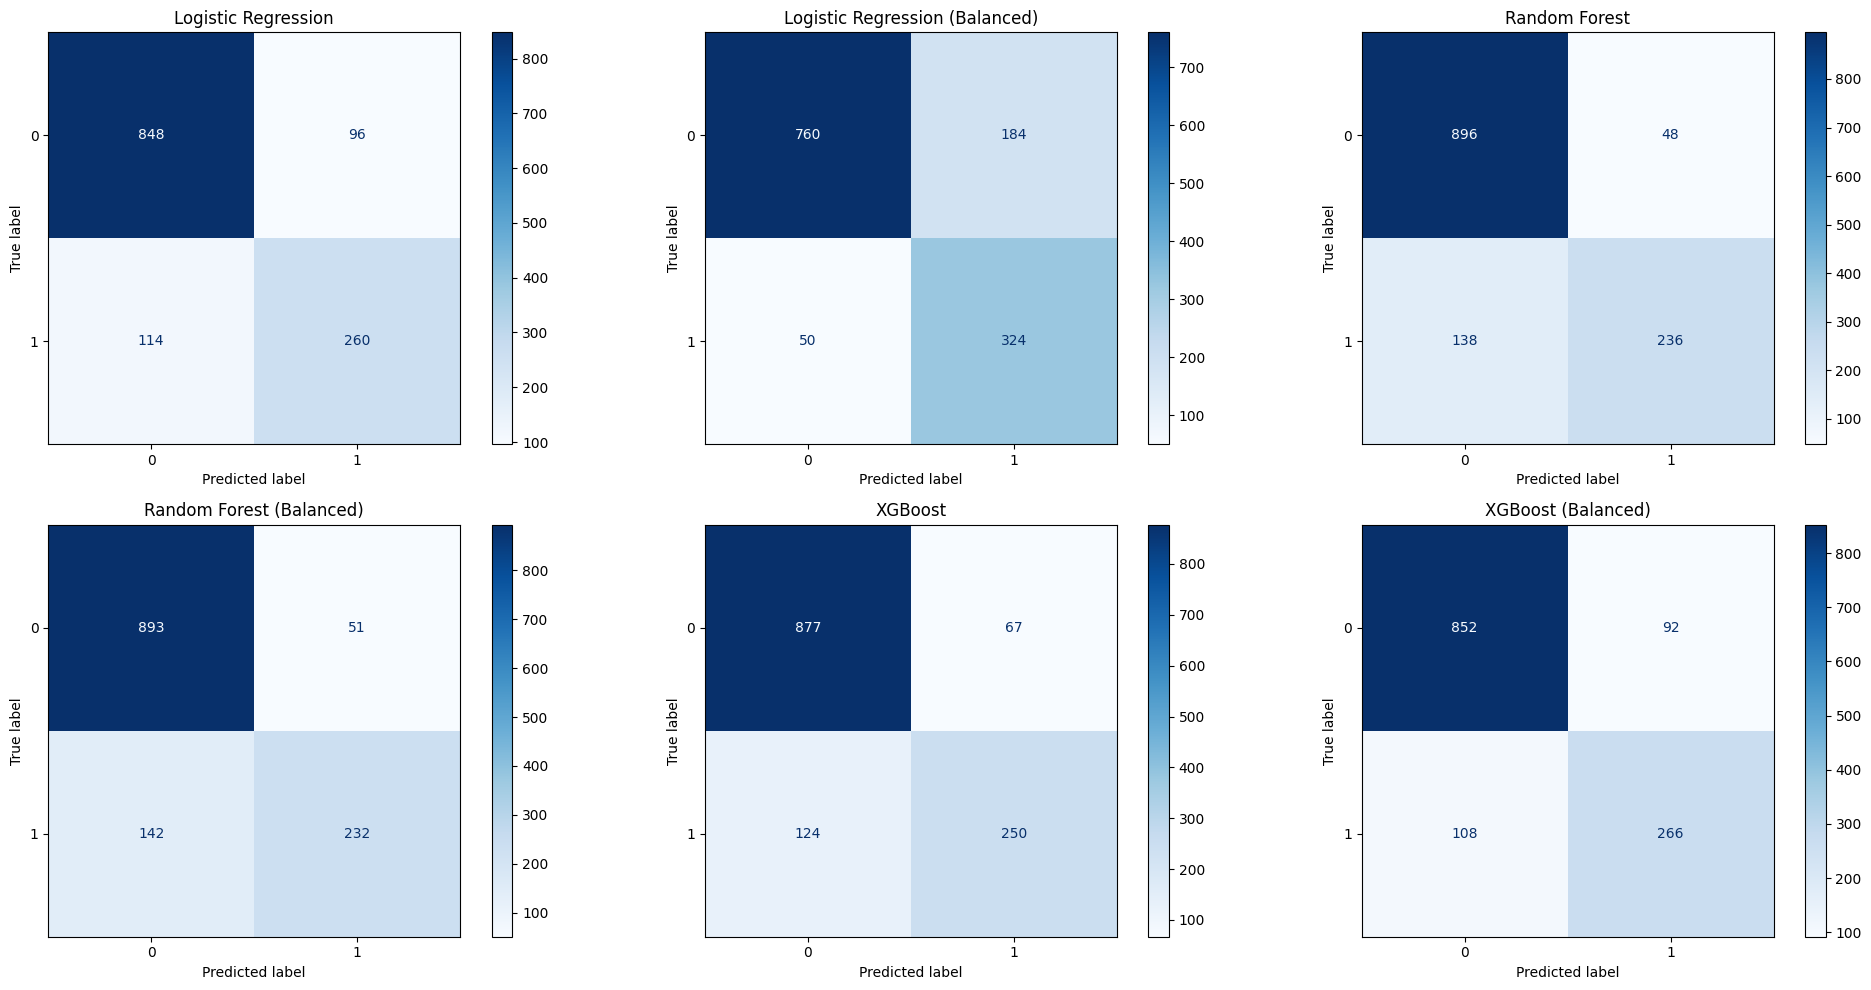

In [ ]:
print("\n--- Menampilkan Visualisasi Confusion Matrix ---")

# Membuat layout subplot 2 baris 3 kolom untuk 6 model
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Loop untuk membuat plot confusion matrix untuk setiap model
for i, (name, pipeline) in enumerate(trained_pipelines.items()):
    axes[i].set_title(name)
    ConfusionMatrixDisplay.from_estimator(
        pipeline,
        X_test,
        y_test,
        cmap='Blues',
        ax=axes[i],
        values_format='d' # Tampilkan angka sebagai integer
    )

plt.tight_layout()
plt.show()


--- Menampilkan Visualisasi ROC Curve ---


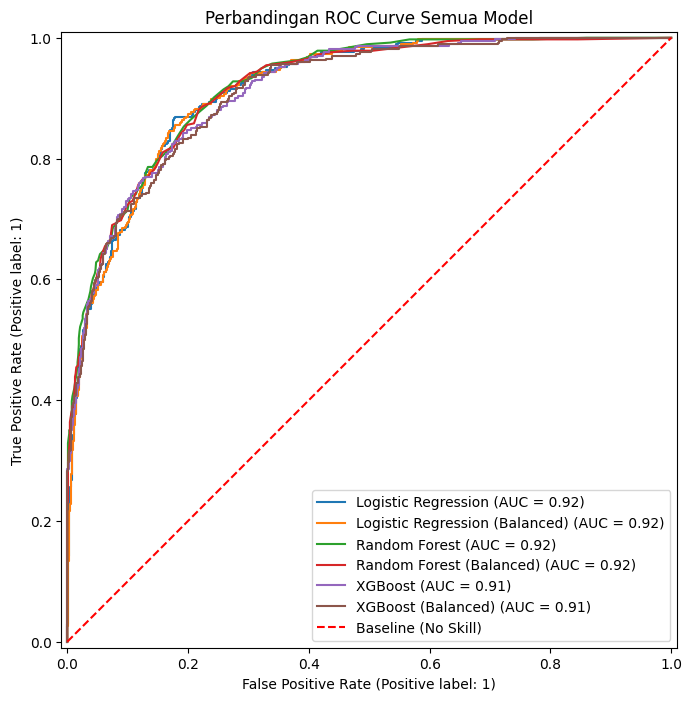

In [ ]:
print("\n--- Menampilkan Visualisasi ROC Curve ---")

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Perbandingan ROC Curve Semua Model")

# Loop untuk plot ROC curve untuk setiap model
for name, pipeline in trained_pipelines.items():
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, name=name, ax=ax)

# Menambahkan garis diagonal sebagai baseline
ax.plot([0, 1], [0, 1], 'r--', label='Baseline (No Skill)')
ax.legend()
plt.show()

In [ ]:
best_model_name = df_final_results.sort_values(by="F1-Score", ascending=False).index[0]
best_model = trained_pipelines[best_model_name]
print(f"\n--- Classification Report untuk Model Terbaik: {best_model_name} ---")
print(classification_report(y_test, best_model.predict(X_test)))


--- Classification Report untuk Model Terbaik: Logistic Regression (Balanced) ---
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       944
           1       0.64      0.87      0.73       374

    accuracy                           0.82      1318
   macro avg       0.79      0.84      0.80      1318
weighted avg       0.85      0.82      0.83      1318



# Interpretasi Hasil Final pada Data Uji

Hasil evaluasi pada data uji mengonfirmasi temuan utama dari tahap cross-validation:
* **Pembobotan kelas (Balanced)** efektif meningkatkan Recall secara signifikan, meskipun dengan sedikit penurunan Precision.
* **XGBoost** dan **Random Forest** cenderung lebih seimbang dalam hal performa keseluruhan dibandingkan Logistic Regression.

**Sorotan utama per model:**
* **Recall tertinggi:** Logistic Regression (Balanced) berhasil menangkap 87% churn bagus untuk meminimalkan pelanggan lolos tanpa terdeteksi.
* **Precision tertinggi:** Random Forest (Balanced) mencapai 82% artinya prediksi churn yang dihasilkan lebih jarang salah.
* **F1-Score terbaik:** Logistic Regression (Balanced) dengan 0.7347, meski perbedaannya tipis dengan XGBoost (Balanced).
* **OC-AUC:** Semua model sangat baik (>0.91), dengan Random Forest standar sedikit unggul dalam membedakan churn vs non-churn.

**Implikasi Bisnis:**

* Logistic Regression (Balanced): cocok jika biaya intervensi rendah, lebih baik banyak alarm palsu daripada kehilangan pelanggan churn.
* Random Forest / XGBoost (Balanced): lebih efisien, alarm palsu lebih sedikit tapi ada risiko churn lolos.

**ROC Curve:**
* Semua model memiliki kemampuan diskriminasi tinggi (AUC > 0.91).
* Tidak ada model yang benar-benar dominan, sehingga pilihan model bisa disesuaikan dengan strategi bisnis (Recall vs Precision).

# Intepretasi Model & Rekomendasi Bisnis Strategis

In [ ]:
import shap
!pip install -q shap

# Inisialisasi Javascript untuk plot SHAP di notebook
shap.initjs()

print("Library SHAP berhasil di-install dan diinisialisasi.")

Library SHAP berhasil di-install dan diinisialisasi.



--- 15 Fitur Paling Penting Menurut XGBoost ---


,feature,importance
40,contract_Month-to-Month,0.416993
1,number_of_dependents,0.072525
8,number_of_referrals,0.045140
41,contract_One Year,0.043165
6,tenure,0.033744
42,contract_Two Year,0.021669
14,partner_No,0.021619
34,streaming_music_No,0.019094
2,monthly_charges,0.018613
32,streaming_movies_No,0.016673


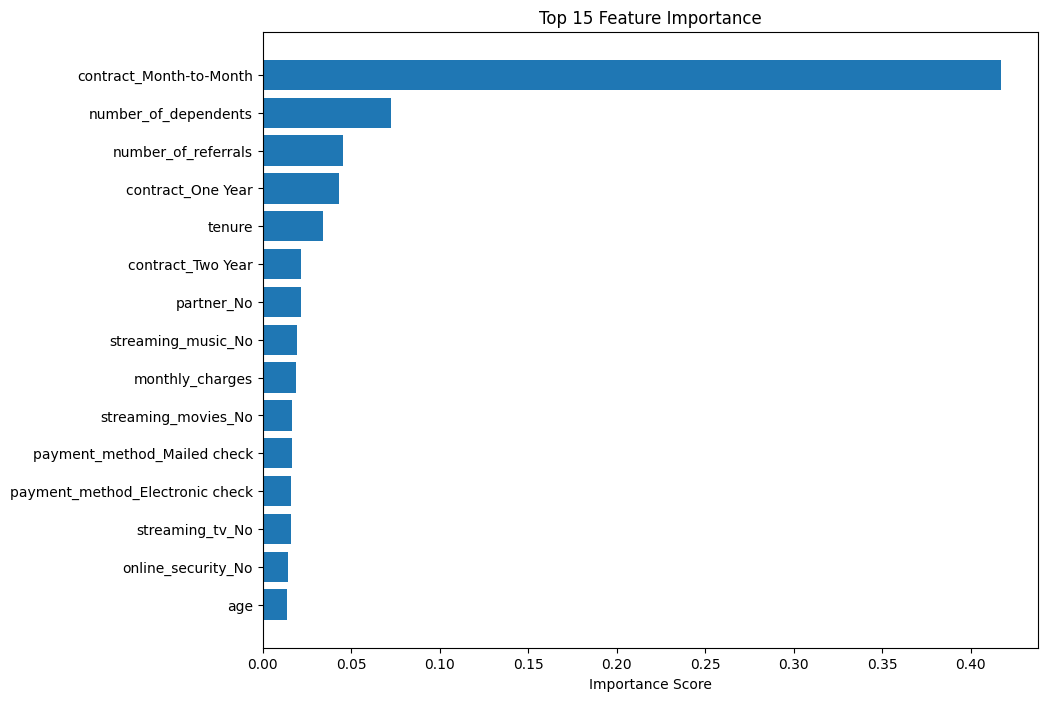

In [ ]:
# --- Ekstrak Feature Importance dari Model Terbaik ---

# Pilihan model akhir: XGBoost (Balanced) -> hasil benchmarking menunjukkan model ini cukup stabil
best_model_pipeline = trained_pipelines['XGBoost (Balanced)']

# Ambil preprocessing step dan classifier dari pipeline
preprocessor = best_model_pipeline.named_steps['preprocessor']
model = best_model_pipeline.named_steps['classifier']

# Ambil nama fitur hasil one-hot encoding
# Supaya kita tahu label setiap bar di grafik importance nanti
encoded_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(
    X_train.select_dtypes(include=['object', 'category']).columns
)

# Satukan dengan nama fitur numerik
final_feature_names = list(X_train.select_dtypes(include=['int64', 'float64']).columns) + list(encoded_feature_names)

# Simpan hasil importance ke DataFrame dan urutkan dari yang paling berpengaruh
df_importance = pd.DataFrame({
    'feature': final_feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Lihat 15 fitur teratas
print("\n--- 15 Fitur Paling Penting Menurut XGBoost ---")
display(df_importance.head(15))

# Visualisasi top 15 feature importance
plt.figure(figsize=(10, 8))
plt.barh(df_importance['feature'].head(15), df_importance['importance'].head(15))
plt.gca().invert_yaxis()  # Biar fitur paling penting muncul di atas
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance Score')
plt.show()

### Analisis & Insight dari Feature Importance

Grafik feature importance dari model menunjukkan hierarki faktor pendorong churn yang konsisten dengan hasil EDA. Ada tiga tema besar yang muncul:

1. Kontrak adalah Faktor Utama
  * Observasi: contract_Month-to-Month menjadi fitur paling dominan (skor hampir 0.45), jauh di atas fitur lain.
  * Interpretasi: Kontrak jangka pendek adalah red flag terbesar churn. Sebaliknya, contract_One Year dan contract_Two Year muncul di peringkat atas sebagai faktor protektif.
  * Implikasi Bisnis: Prioritas utama strategi retensi adalah mendorong konversi kontrak bulan-ke-bulan -> kontrak tahunan dengan promosi atau loyalty reward.

2. Keterikatan Pelanggan (Stickiness) Mempengaruhi Loyalitas
  * Observasi: number_of_dependents dan number_of_referrals berada di 3 besar.
  * Interpretasi: Pelanggan dengan tanggungan keluarga atau yang pernah mereferensikan layanan lebih cenderung loyal, karena mereka lebih terikat pada ekosistem.
  * Implikasi Bisnis:
    * Bangun program Family Plan untuk pelanggan dengan dependents.
    * Perkuat program Refer-a-Friend dengan insentif lebih besar untuk mendorong referral baru.

3. Tenure dan Engagement Masih Penting
  * Observasi: tenure masuk 5 besar, bersama faktor seperti metode pembayaran (electronic/mailed check), add-on services (streaming, online security), dan biaya bulanan.
  * Interpretasi: Pelanggan yang lebih lama berlangganan cenderung lebih stabil. Sebaliknya, churn lebih rentan terjadi di awal periode langganan.
  * Implikasi Bisnis: Fokus pada early engagement & onboarding di 3–6 bulan pertama, serta dorong penggunaan layanan tambahan (entertainment/security) agar pelanggan lebih merasa “melekat” dengan produk.

**Rangkuman**
1. Konversi kontrak jangka pendek -> jangka panjang.
2. Dorong keterikatan pelanggan lewat dependents & referral.
3. Perkuat onboarding & early engagement di awal langganan.
4. Segmentasi tambahan berdasarkan metode pembayaran & add-on services.




SHAP values berhasil dihitung.

--- SHAP Summary Plot ---


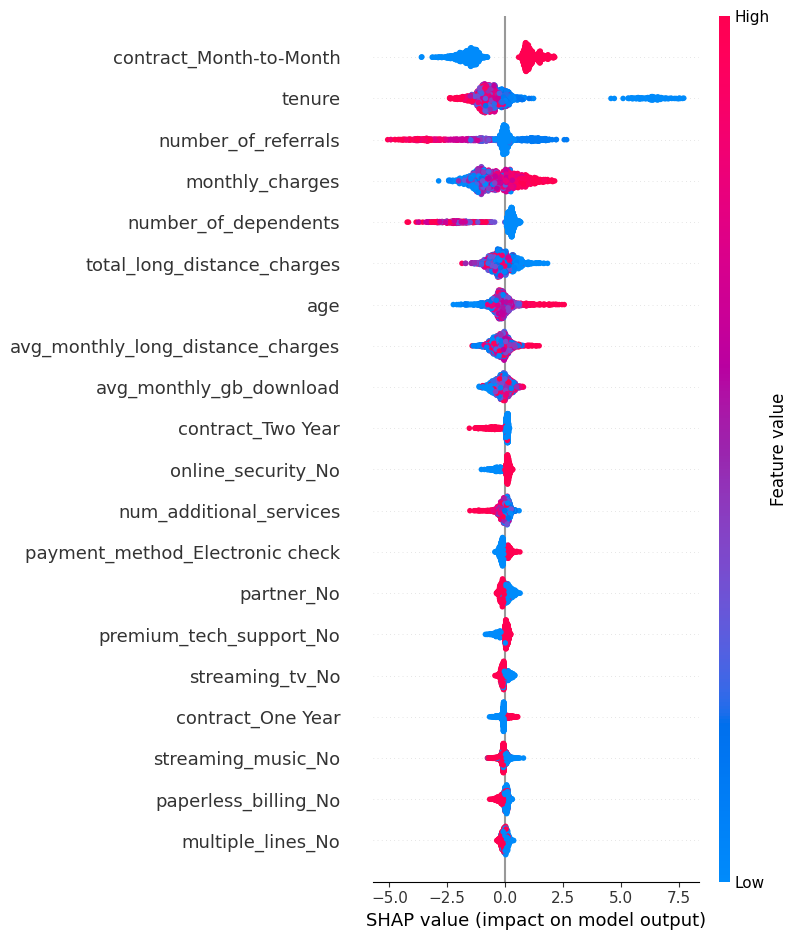

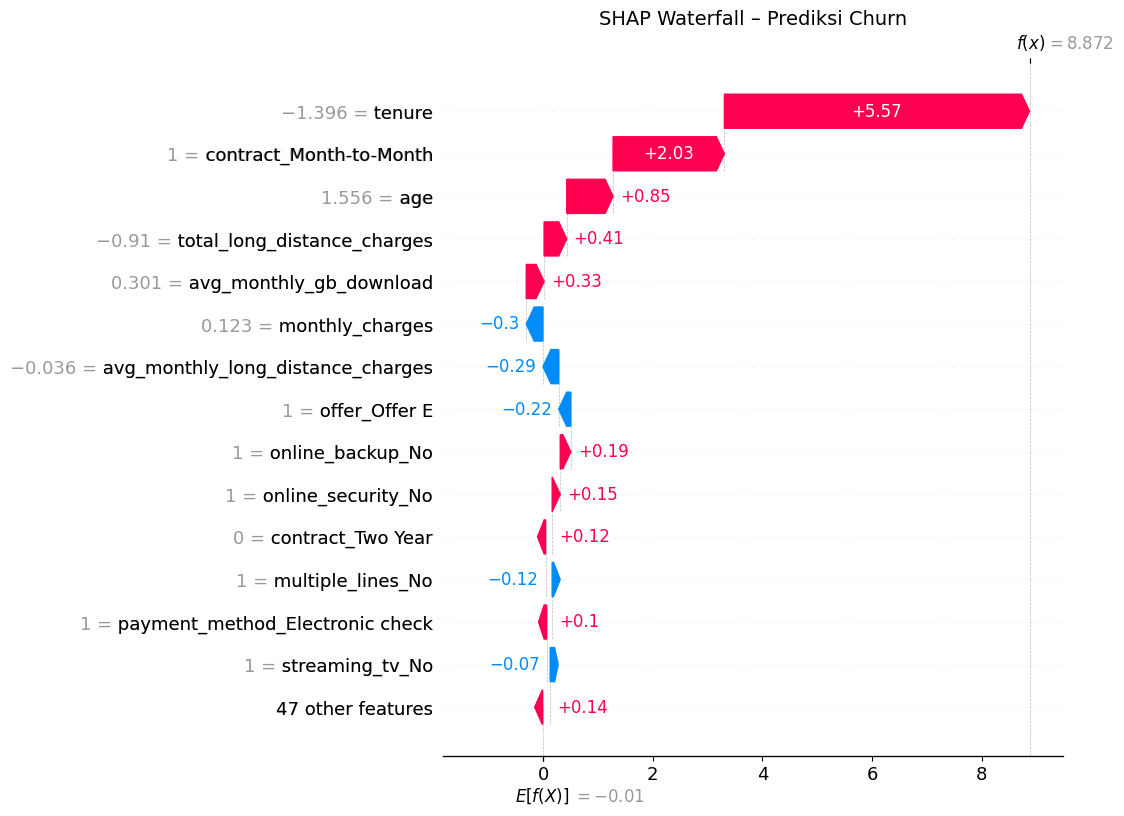

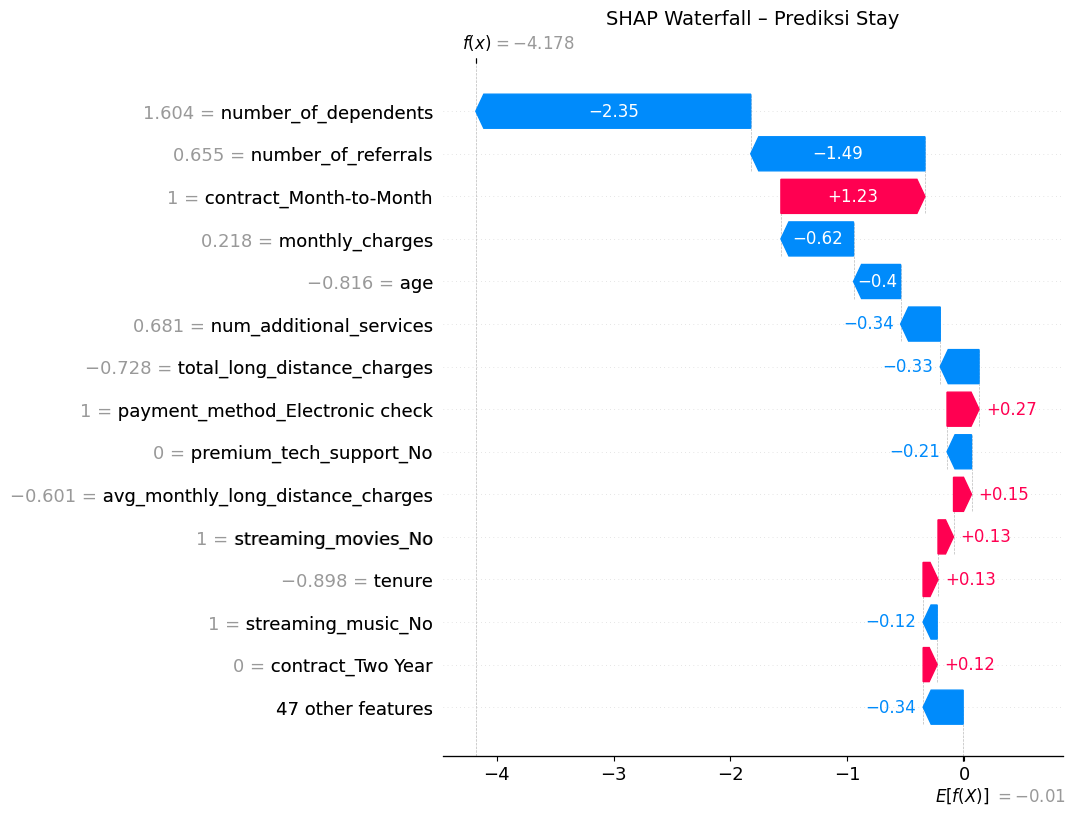

In [ ]:
# --- Analisis Mendalam dengan SHAP (SHapley Additive exPlanations) ---
# SHAP membantu kita memahami seberapa besar kontribusi tiap fitur
# dalam mendorong prediksi churn atau tetap stay.

# Transform data train & test pakai preprocessor dari pipeline
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = pd.DataFrame(
    preprocessor.transform(X_test),
    columns=final_feature_names
)

# Buat SHAP Explainer dari model yang sudah dilatih
explainer = shap.TreeExplainer(model)

# Hitung SHAP values untuk data test
shap_values = explainer(X_test_transformed)
print("\nSHAP values berhasil dihitung.")

# --- Visualisasi 1: Summary Plot (gambaran umum) ---
# Menunjukkan fitur mana yang paling berpengaruh secara global
# dan arah pengaruhnya (nilai tinggi -> cenderung merah, rendah -> biru).
print("\n--- SHAP Summary Plot ---")
shap.summary_plot(shap_values, X_test_transformed)

# --- Visualisasi 2: Waterfall Plot (kasus individual) ---
# Waterfall plot dipakai untuk menjelaskan prediksi pada pelanggan tertentu.
# Kita pilih 1 pelanggan yang diprediksi churn dan 1 yang diprediksi stay.

# Cari indeks pelanggan churn (prediksi = 1) dan stay (prediksi = 0)
y_pred_test = best_model_pipeline.predict(X_test)
churn_customer_index = np.where(y_pred_test == 1)[0][0]   # pelanggan churn pertama
stayed_customer_index = np.where(y_pred_test == 0)[0][0]  # pelanggan stay pertama

# print(f"\n--- Analisis SHAP untuk Pelanggan Individual ---")

# # Waterfall untuk pelanggan churn
# print("\nPenjelasan prediksi pelanggan CHURN:")
# shap.plots.waterfall(shap_values[churn_customer_index], max_display=15)

# # Waterfall untuk pelanggan stay
# print("\nPenjelasan prediksi pelanggan STAY:")
# shap.plots.waterfall(shap_values[stayed_customer_index], max_display=15)


# Waterfall churn
shap.plots.waterfall(shap_values[churn_customer_index], max_display=15, show=False)
plt.title("SHAP Waterfall – Prediksi Churn", fontsize=14)
plt.show()

# Waterfall stay
shap.plots.waterfall(shap_values[stayed_customer_index], max_display=15, show=False)
plt.title("SHAP Waterfall – Prediksi Stay", fontsize=14)
plt.show()


## SHAP Interpretation Customer Churn Analysis

## 1. SHAP Summary Plot (Gambaran Umum)
- **contract_Month-to-Month** -> faktor paling berpengaruh.  
  - Nilai tinggi (Ya) -> kuat mendorong **churn**.  
- **tenure** -> semakin lama, semakin menahan churn.  
  - Tenure rendah -> risiko churn tinggi.  
  - Tenure panjang -> pelanggan loyal.  
- **number_of_referrals & number_of_dependents** -> nilai tinggi mendorong **stay**.  
- **monthly_charges & payment_method (Electronic Check)** -> cenderung meningkatkan churn.  

**Insight Kunci:** Plot ini mengonfirmasi temuan EDA kita -> pelanggan baru dengan kontrak bulanan dan biaya tinggi sangat rawan churn, sedangkan keterikatan sosial (referral/tanggungan) menahan churn.

---

## 2. SHAP Waterfall Plot (Analisis Kasus Individual)

### Kasus Prediksi CHURN (f(x) = 8.872)
- **Pendorong Churn:**
  - Tenure sangat rendah (+5.57) -> pelanggan baru.  
  - Contract = Month-to-Month (+2.03).  
  - Usia muda & biaya bulanan relatif tinggi.  
- **Faktor Penahan:** hampir tidak ada.  

**Kesimpulan:** Profil klasik pelanggan berisiko -> baru, kontrak bulanan, biaya tinggi -> model sangat yakin akan churn.

---

### Kasus Prediksi STAY (f(x) = -4.178)
- **Pendorong Stay:**
  - Dependents tinggi (-2.35).  
  - Banyak referrals (-1.49).  
  - Tenure panjang & biaya bulanan moderat.  
- **Faktor Risiko:** Contract = Month-to-Month (+1.23), tapi kalah oleh faktor loyalitas.  

**Kesimpulan:** Pelanggan ini tetap stay karena keterikatan sosial & loyalitas, meskipun kontraknya berisiko.

---

## 3. Implikasi Bisnis
1. **Retensi kontrak bulanan** -> tawarkan konversi ke tahunan dengan promo.  
2. **Pelanggan baru** -> beri onboarding & insentif khusus untuk menurunkan churn.  
3. **Kelola biaya bulanan** -> paket hemat/bundling bagi pelanggan dengan biaya tinggi.  
4. **Payment method** -> dorong auto-debit/credit card untuk mengurangi churn.  
5. **Referral & family plan** -> terbukti kuat menahan churn, perlu diperluas.

---

**Kesimpulan Utama:**  
SHAP membantu menjawab *“mengapa”* di balik churn:  
- **Global view** -> kontrak bulanan + tenure rendah + biaya tinggi = risiko utama.  
- **Local view** -> cerita individual pelanggan, siapa yang rawan churn dan siapa yang loyal.  
Ini memberi dasar kuat untuk strategi **segmentasi & retensi pelanggan**.


In [ ]:
# Impor library joblib untuk menyimpan model
import joblib

# Berdasarkan F1-Score dan Recall tertinggi di data uji, kita pilih Logistic Regression (Balanced)
final_model_pipeline = trained_pipelines['Logistic Regression (Balanced)']

# Simpan pipeline ke dalam sebuah file
joblib.dump(final_model_pipeline, 'churn_model_pipeline.pkl')

print("Model pipeline berhasil disimpan ke file 'churn_model_pipeline.pkl'")

Model pipeline berhasil disimpan ke file 'churn_model_pipeline.pkl'


In [ ]:
# Misalnya df_final itu hasil dataset sudah dibersihkan
df_cleaned.to_csv("clean_churn_data.csv", index=False)


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1
